In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

(35.0, 50.0)

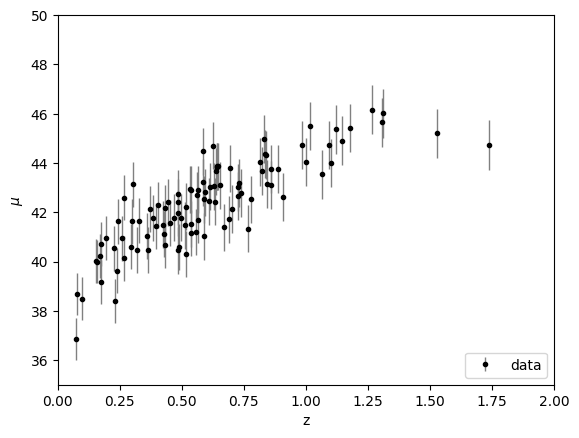

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

In [3]:
x = z_sample[:,np.newaxis]
y = mu_sample[:,np.newaxis]

## First tries

### Linear regression (all data for testing)

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)

x_new = np.array([[0], [2]])
y_pred = lin_reg.predict(x_new)

[39.56505555] [[4.64711848]]


(35.0, 50.0)

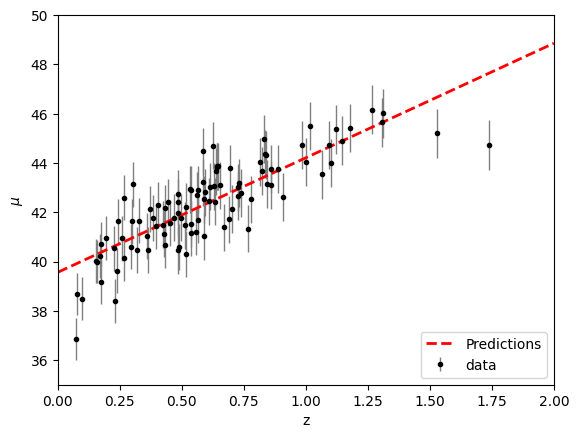

In [5]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_new, y_pred, "r--", linewidth=2, label="Predictions")
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Polynomial regression (all data for testing)

#### Degree 2

In [6]:
from astroML.linear_model import PolynomialRegression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [7]:
#from astroML.linear_model import PolynomialRegression

degree = 2
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(x, mu_sample)

x_grid = np.linspace(0,2,1000)[:,np.newaxis]
y_pred1 = model.predict(x_grid)
n_constraints = degree + 1

print(model.coef_)

[38.44821027  8.49035585 -2.57760572]


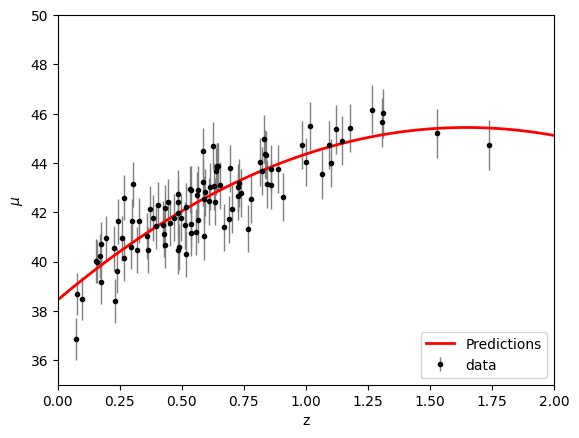

In [8]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, y_pred1, color = 'r', linewidth=2, label="Predictions")
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

#### Higher degrees

(35.0, 50.0)

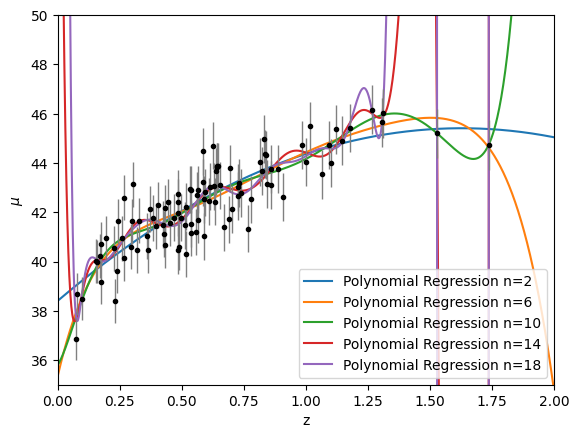

In [9]:
for n in np.arange(1,20)[1::4]:
    model = PolynomialRegression(n)
    model.fit(x, mu_sample, dmu)
    y_pred2 = model.predict(x_grid)
    plt.plot(x_grid, y_pred2,label='Polynomial Regression n='+str(n))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Basis regression (all data for testing)

In [20]:
#Basis function regression looks like this
from astroML.linear_model import BasisFunctionRegression

# mean positions of the 2 Gaussians in the model
basis_mu = np.linspace(0,2,2)[:, None]
# widths of these Gaussians
basis_sigma = 0.1 * (basis_mu[1] - basis_mu[0]) #Riscalato!

model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
model.fit(x, mu_sample, dmu)

y_pred2 = model.predict(x_grid)
print(model.coef_)

[43.06863874 -2.61052705  2.3699808 ]


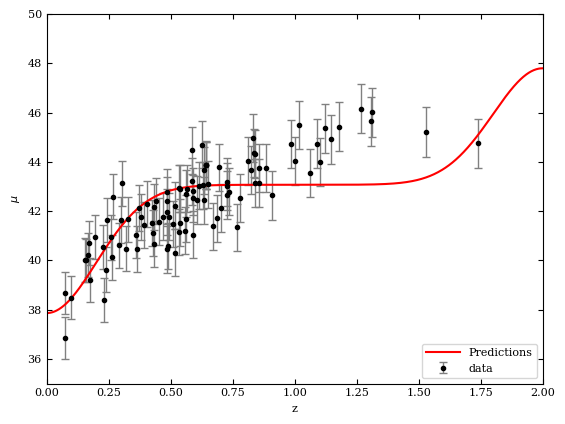

In [21]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.plot(x_grid, y_pred2, color='r', label="Predictions")

plt.legend(loc='lower right')
plt.show()

(35.0, 50.0)

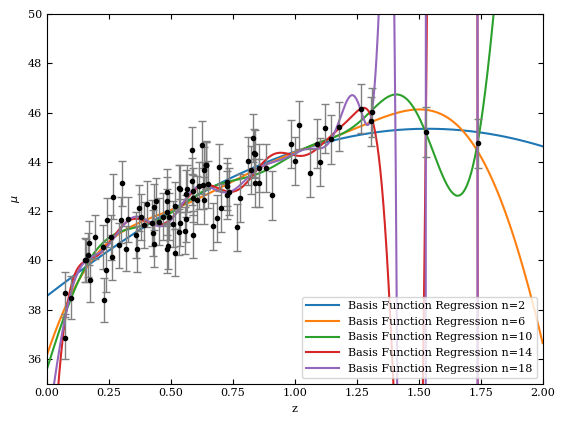

In [25]:
for n in np.arange(1,20)[1::4]:

    basis_mu = np.linspace(0,2,n)[:, None]
    basis_sigma = 1 * (basis_mu[1] - basis_mu[0]) #Riscalato!

    model = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    model.fit(x, mu_sample, dmu)

    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, label='Basis Function Regression n='+str(n))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Kernel regression (all data for testing)

(35.0, 50.0)

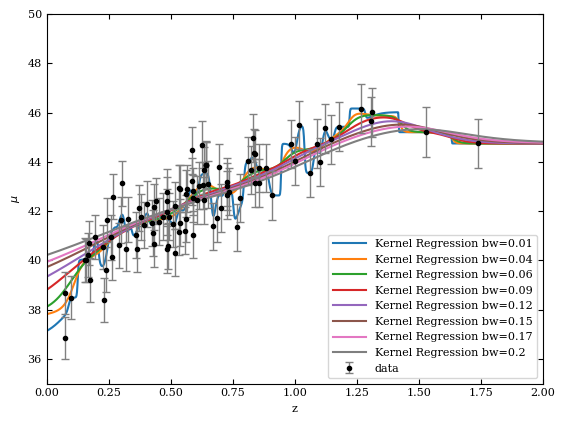

In [28]:
from astroML.linear_model import NadarayaWatson

for bw in np.round(np.linspace(0.01,0.2,8),2):
    model = NadarayaWatson('gaussian', bw)
    model.fit(x,mu_sample)

    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, label='Kernel Regression bw='+str(bw))


plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

## Cross validation

# <span style="color:RED"> DA CORREGGERE CON SOLUZIONE PROF</span> 

In [15]:
print(np.size(x))

100


In [16]:
# Genera indici di permutazione
perm = np.random.permutation(len(x))

# Applica gli indici di permutazione ad entrambi gli array
x_sh = x[perm]
y_sh = y[perm]

(1, 75)


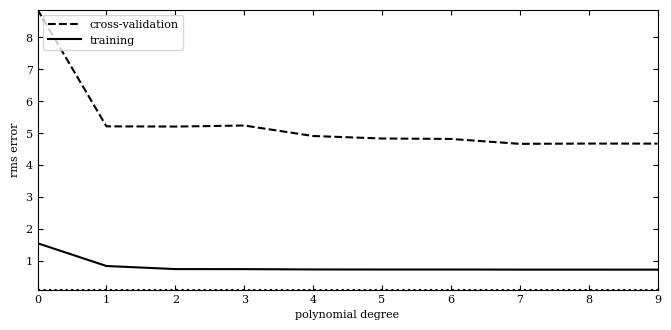

In [17]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


x_test = x[:75].reshape(1, -1)
y_test = y[:75].reshape(1, -1)
x_test_flat = x_test.flatten()
y_test_flat = y_test.flatten()
x_cv = x[75:].reshape(1, -1)
y_cv = y[75:].reshape(1, -1)
x_cv_flat = x_cv.flatten()
y_cv_flat = y_cv.flatten()
print(np.shape(x_test))
dy = dmu


# Third figure: plot errors as a function of polynomial degree d
d = np.arange(0, 10)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))
for i in range(len(d)):
    p = np.polyfit(x_test_flat, y_test_flat, d[i])
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x_test) - y_test) ** 2)
                              / len(y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

#BIC_train = np.sqrt(len(y_test)) * training_err / dy + d * np.log(len(y_test))
#BIC_crossval = np.sqrt(len(y_test)) * crossval_err / dy + d * np.log(len(y_test))

ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')
ax.plot(d, 0.1 * np.ones(d.shape), ':k')

#ax.set_xlim(0, 14)
#ax.set_ylim(0, 0.8)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

#ax = fig.add_subplot(212)
#ax.plot(d, BIC_crossval, '--k', label='cross-validation')
#ax.plot(d, BIC_train, '-k', label='training')

#ax.set_xlim(0, 14)
#ax.set_ylim(0, 100)

#ax.legend(loc=2)
#ax.set_xlabel('polynomial degree')
#ax.set_ylabel('BIC')

plt.show()

For after the correction: I look at the errors and the best model is the one that has a lower error
on the validation set. So I pick that one, and this is why we use cross validation

Look at the final plot --> the fit with only training data can be generalized very well with all data, so that's good!